In [56]:
/****************************************************************************
* File name: empirical_exercise4.do
* Author(s): Sze, J.
* Date: 2/26/2019
* Description: 
* Answers to empirical exercise 4 for Labor Economics
*
* Inputs: 
* ..\input_data\Small CPS, 2018.dta" 
* 
* Outputs:
* 
***************************************************************************/

This week’s exercise uses the Small CPS, 2018.dta file (updated to include December). The
extract contains samples of the civilian, working-age population (i.e., everyone age 16 and older
who is not in the military) and randomly draws 1,000 observations per month, so the data set
contains 12,000 observations.

In [57]:
*log using "..\log\empirical_exercise4", replace


In [58]:
use "..\input_data\Small CPS, 2018", clear

(1000 Obs./Month Extract of the CPS Merged-Outgoing-Rotation-Group Files, 2018)


In [59]:
describe


Contains data from ..\input_data\Small CPS, 2018.dta
  obs:        11,000                          1000 Obs./Month Extract of the CPS Merged-Outgoing-Rotation-Group Files, 2018
 vars:            22                          17 Jan 2019 14:16
 size:       484,000                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
idcode          int     %9.0g               * ID Code
weight          double  %7.1f              

Compute an hourly real wage variable.

In [60]:
gen rwage_hourly = rwage/hours
label variable rwage_hourly "Real hourly wages"

### A. Analyze Occupation Averages. 
Collapse the weekly hours and hourly real wage variables
to weighted averages by occupation. Your data set of occupation averages should also
include a weighting variable that equals the sum of each occupation’s weights. In the
data set of occupation averages, regress weekly hours on the hourly real wage, weighting
the estimates by occupation size. Save the predicted values and produce a scatter plot of
hours and the hourly real wage; include the estimated regression line. (Bonus: replace the
data points in the scatter plot with bubbles that reflect occupation size.) Use rvfplot to
search for inappropriate patterns in the residuals. Repeat the regression (with plots) with
the dependent variable and regressor in logs. How are the workweek and the hourly real
wage related across occupations?

In [61]:
gen occupation_wt = 1
label variable occupation_wt "Occupation weights"

In [62]:
// Copy variable labels before collapse
 foreach v of var * {
            local l`v' : variable label `v'
            if `"`l`v''"' == "" {
            local l`v' "`v'"
}
}
// Obtain averages by occupation
collapse (mean) rwage_hourly hours (sum) occupation_wt ///
[pweight = weight], by(occupation)

// Attach the saved labels after collapse
foreach v of var * {
            label var `v' "`l`v''"
}

In [63]:
regress hours rwage_hourly [pweight = occupation_wt]
predict yhat


(sum of wgt is 113,203,559.8744)

Linear regression                               Number of obs     =         58
                                                F(1, 56)          =      24.48
                                                Prob > F          =     0.0000
                                                R-squared         =     0.4056
                                                Root MSE          =     2.9514

------------------------------------------------------------------------------
             |               Robust
       hours |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
rwage_hourly |   .1797444   .0363315     4.95   0.000     .1069637    .2525251
       _cons |   33.28122   1.353322    24.59   0.000     30.57019    35.99225
------------------------------------------------------------------------------

(option xb assumed; fitted values)



(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)


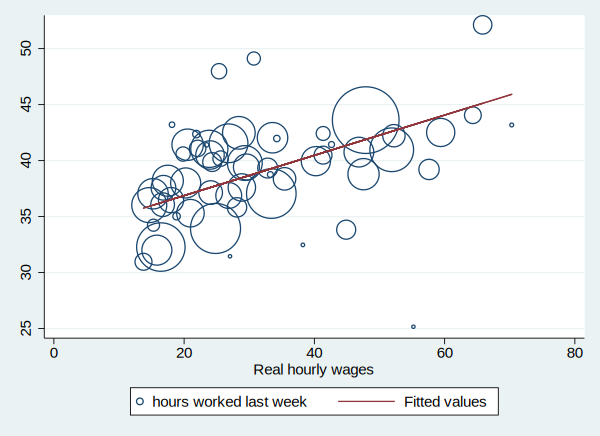




(file ..\outputs\ee4_wages_occupation.pdf written in PDF format)


In [64]:
twoway scatter hours rwage_hourly [w=occupation_wt], msymbol(circle_hollow) ///
|| line yhat rwage_hourly 
graph export "..\outputs\ee4_wages_occupation.pdf",as(pdf) replace


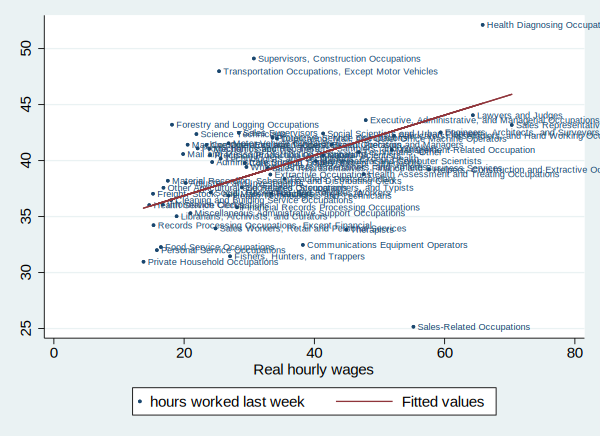

In [65]:
twoway scatter hours rwage_hourly, mlabel(occupation) mlabsize(vsmall)  msize(vsmall) /// 
|| line yhat rwage_hourly

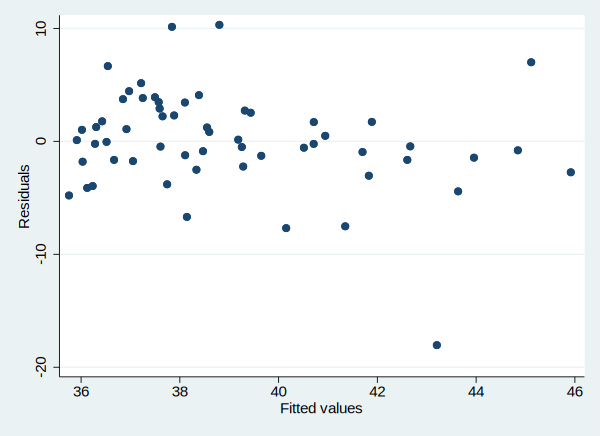





(file ..\outputs\ee4_wages_occupation_residualplots.pdf written in PDF format)


In [66]:
rvfplot
graph export "..\outputs\ee4_wages_occupation_residualplots.pdf",as(pdf) replace

In [67]:
gen lg_hours = log(hours)
label variable lg_hours "Log of hours"

In [68]:
gen lg_rwage_hourly = log(rwage_hourly)
label variable lg_rwage_hourly "Log of hourly real wages"

In [69]:
regress lg_hours lg_rwage_hourly [pweight = occupation_wt]
predict yhat2


(sum of wgt is 113,203,559.8744)

Linear regression                               Number of obs     =         58
                                                F(1, 56)          =      26.90
                                                Prob > F          =     0.0000
                                                R-squared         =     0.4270
                                                Root MSE          =     .07508

---------------------------------------------------------------------------------
                |               Robust
       lg_hours |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
lg_rwage_hourly |   .1509369   .0290999     5.19   0.000     .0926428    .2092309
          _cons |   3.150012   .1021095    30.85   0.000     2.945462    3.354562
---------------------------------------------------------------------------------

(option xb assumed; fitted values)



(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)


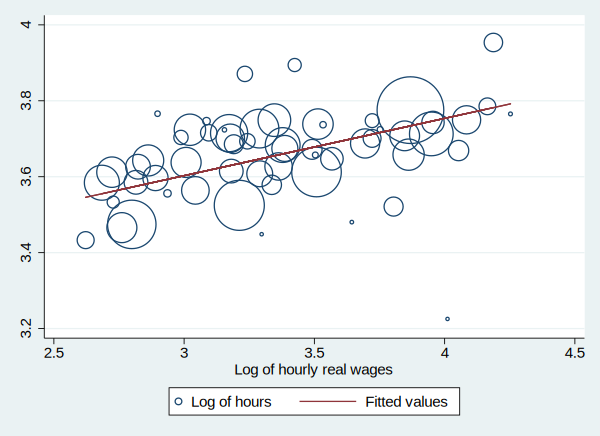




(file ..\outputs\ee4_lgwages_occupation.pdf written in PDF format)


In [70]:
twoway scatter lg_hours lg_rwage_hourly [w=occupation_wt], msymbol(circle_hollow) ///
|| line yhat2 lg_rwage_hourly 
graph export "..\outputs\ee4_lgwages_occupation.pdf",as(pdf) replace

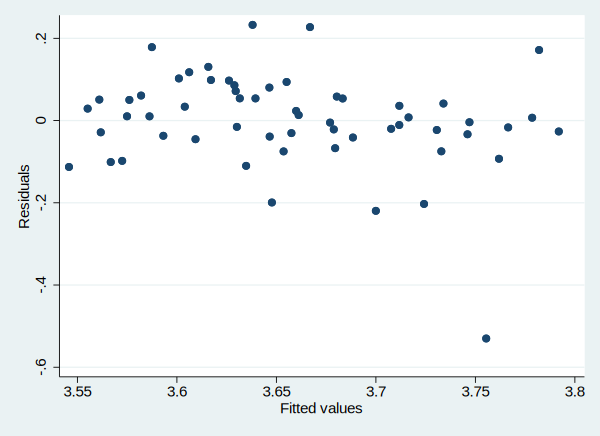





(file ..\outputs\ee4_lgwages_occupation_residualplots.pdf written in PDF format)


In [71]:
rvfplot
graph export "..\outputs\ee4_lgwages_occupation_residualplots.pdf",as(pdf) replace

In [72]:
// How are the workweek and the hourly real wage related across occupations?
/* The residual plots show that there are no trends in the residuals. 
The scatter plot of the logged hours and hourly wages on the predicted line, 
shows that longer working hours are associated with higher hourly wages*/

### B. Analyze Education Averages. 
Switch from occupation averages to education averages.
That is, collapse the weekly hours and hourly real wage variables to weighted averages
by grade. Your data set of education averages should also include a weighting variable
that equals the sum of each grade’s weights. In the data set of education averages, regress
weekly hours on the hourly real wage, weighting the estimates by grade size. Save the
predicted values and produce a scatter plot of hours and the hourly real wage; include the
estimated regression line. (Bonus: replace the data points in the scatter plot with bubbles
that reflect grade size.) Use rvfplot to search for inappropriate patterns in the residuals.
Repeat the regression (with plots) with the dependent variable and

In [73]:
use "..\input_data\Small CPS, 2018", clear

(1000 Obs./Month Extract of the CPS Merged-Outgoing-Rotation-Group Files, 2018)


In [74]:
gen rwage_hourly = rwage/hours
label variable rwage_hourly "Real hourly wages"
gen education_wt = 1
label variable education_wt "Education weights"

In [75]:
// Copy variable labels before collapse
foreach v of var * {
        local l`v' : variable label `v'
            if `"`l`v''"' == "" {
            local l`v' "`v'"
            }
}
 
// Obtain averages by school grade
collapse (mean) rwage_hourly hours (sum) education_wt ///
[pweight = weight], by(grade)

// Attach the saved labels after collapse
foreach v of var * {
        label var `v' "`l`v''"
 }

In [76]:
regress hours rwage_hourly [pweight = education_wt]
predict yhat


(sum of wgt is 113,203,559.8744)

Linear regression                               Number of obs     =         11
                                                F(1, 9)           =       8.63
                                                Prob > F          =     0.0165
                                                R-squared         =     0.4627
                                                Root MSE          =     1.6907

------------------------------------------------------------------------------
             |               Robust
       hours |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
rwage_hourly |    .123159   .0419211     2.94   0.017      .028327     .217991
       _cons |   35.06591   1.707246    20.54   0.000     31.20385    38.92797
------------------------------------------------------------------------------

(option xb assumed; fitted values)



(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)


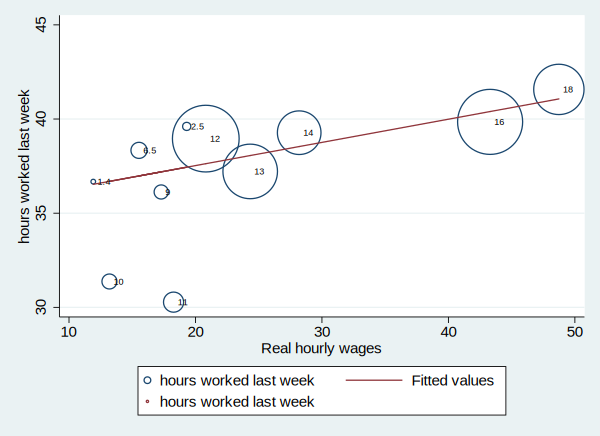




(file ..\outputs\ee4_wages_education.pdf written in PDF format)


In [77]:
twoway scatter hours rwage_hourly [w=education_wt], msymbol(circle_hollow) ///
|| line yhat rwage_hourly ///
|| scatter hours rwage_hourly, mlabel(grade) mlabsize(vsmall)  msize(vsmall)  mcolor(none) mlabcolor(black)
graph export "..\outputs\ee4_wages_education.pdf",as(pdf) replace

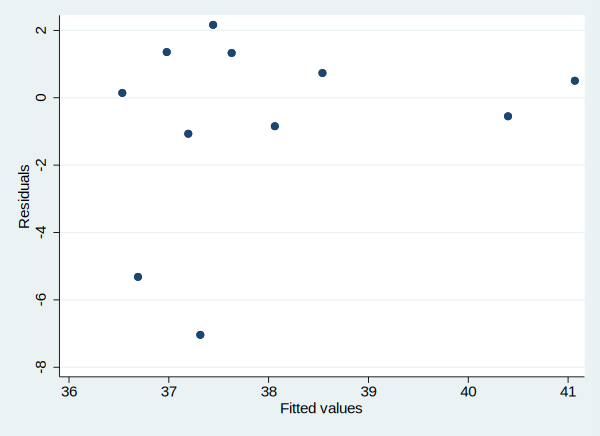





(file ..\outputs\ee4_wages_education_residualplots.pdf written in PDF format)


In [78]:
rvfplot
graph export "..\outputs\ee4_wages_education_residualplots.pdf",as(pdf) replace

In [79]:
gen lg_hours = log(hours)
label variable lg_hours "Log of hours"

In [80]:
gen lg_rwage_hourly = log(rwage_hourly)
label variable lg_rwage_hourly "Log of hourly real wages"

In [81]:
regress lg_hours lg_rwage_hourly [pweight = education_wt]
predict yhat2


(sum of wgt is 113,203,559.8744)

Linear regression                               Number of obs     =         11
                                                F(1, 9)           =       7.19
                                                Prob > F          =     0.0251
                                                R-squared         =     0.4479
                                                Root MSE          =     .04708

---------------------------------------------------------------------------------
                |               Robust
       lg_hours |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
----------------+----------------------------------------------------------------
lg_rwage_hourly |   .1040118   .0387783     2.68   0.025     .0162893    .1917343
          _cons |   3.308779   .1413521    23.41   0.000     2.989018     3.62854
---------------------------------------------------------------------------------

(option xb assumed; fitted values)



(analytic weights assumed)
(analytic weights assumed)
(analytic weights assumed)


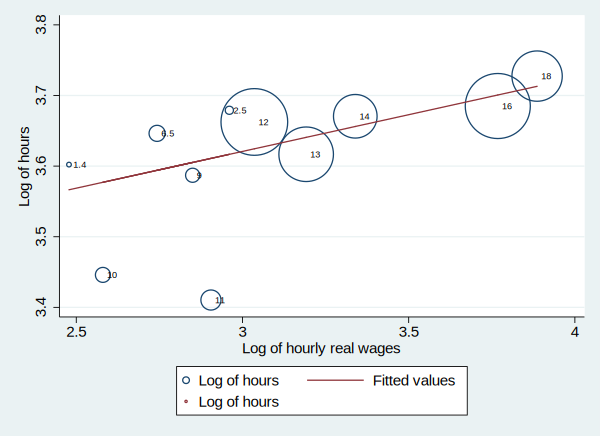




(file ..\outputs\ee4_lgwages_education.pdf written in PDF format)


In [82]:
twoway scatter lg_hours lg_rwage_hourly [w=education_wt], msymbol(circle_hollow) ///
|| line yhat2 lg_rwage_hourly ///
|| scatter lg_hours lg_rwage_hourly, mlabel(grade) mlabsize(vsmall)  msize(vsmall)  mcolor(none) mlabcolor(black)
graph export "..\outputs\ee4_lgwages_education.pdf",as(pdf) replace

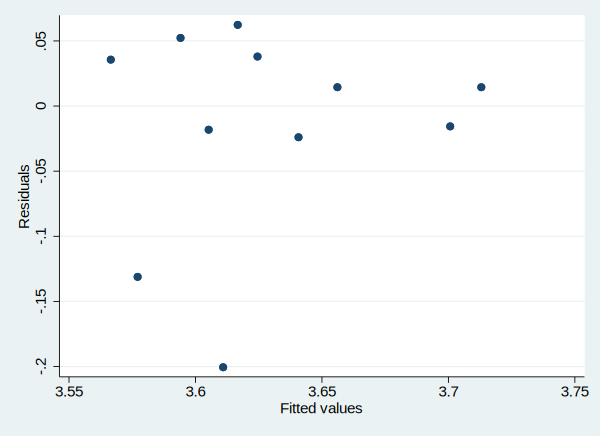





(file ..\outputs\ee4_lgwages_education_residualplots.pdf written in PDF format)


In [83]:
rvfplot
graph export "..\outputs\ee4_lgwages_education_residualplots.pdf",as(pdf) replace